# Unsupervised Learning

In [1]:
# In this, "Clusters" are formed on the basis of specific/common properties/features/patterns fromdatapoints of X
# Clusters are made up of exclusive data points ie. no common points between 2 clusters
# How many clusters to be formed and which data point belongs to which perticular cluster is decided mathematically

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('../Unsupervised Learning/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

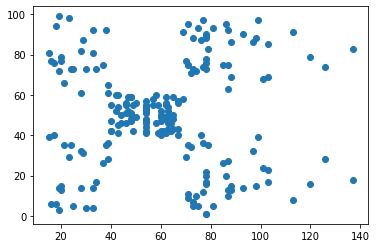

In [6]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

# Kmeans Algo

In [7]:
# In this, we have to give i/p for how many clusters are to be formed on given data
# Steps of Cluster formation:-
# 1) Initiate the given no of cluster centers randomly at any location
# 2) Distribute the data points wrt cluster centers according to nearest distance (Eucledian distance formula)
# 3) Recalculate the cluster centers acccording to distances of points.
# 4) Repeat the process in pt 2 and 3 to find new cluster centers
# 5) If no any point is changing frm one cluster to another in data pnts distribution, thn cluster centers will not change
# 6) Then clusters will be formed according to cluster centerrs without any common points
# Here, scaling is needed as distance formula is used. This algo will not work properly if cluster centers are overlapping

In [8]:
from sklearn.cluster import KMeans   # Import KMeans model

In [9]:
model = KMeans(n_clusters=5)  # Here, we require to give no of clusters
model.fit(X) # Here we give only X as y is absent. It will find out cluster centers for given no of clusters by dist formla

KMeans(n_clusters=5)

In [10]:
model.predict([[40,86]])
# Here it will predict that in which cluster the given point is present by cal. the dist betw. given pt & cluster center
# It will predict the cluster with minimum distance betw given pt & Cluster center

array([4])

In [11]:
model.cluster_centers_  # It will give the values of cluster centers (Annual Income, Spending Score )

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [12]:
cluster_nos = model.predict(X)

In [13]:
cluster_nos

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

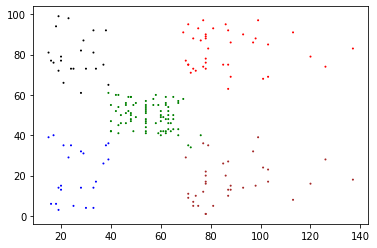

In [14]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], (cluster_nos ==0), c='red')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], (cluster_nos ==1), c='blue')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], (cluster_nos ==2), c='green')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], (cluster_nos ==3), c='brown')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], (cluster_nos ==4), c='black')

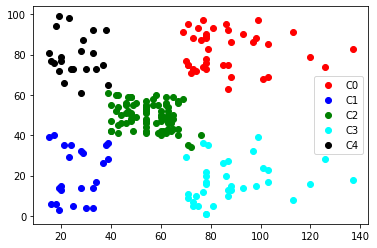

In [15]:
plt.scatter(X[cluster_nos ==0]['Annual Income (k$)'], X[cluster_nos ==0]['Spending Score (1-100)'], c='red', label='C0')
plt.scatter(X[cluster_nos ==1]['Annual Income (k$)'], X[cluster_nos ==1]['Spending Score (1-100)'], c='blue', label='C1')
plt.scatter(X[cluster_nos ==2]['Annual Income (k$)'], X[cluster_nos ==2]['Spending Score (1-100)'], c='green', label='C2')
plt.scatter(X[cluster_nos ==3]['Annual Income (k$)'], X[cluster_nos ==3]['Spending Score (1-100)'], c='cyan', label='C3')
plt.scatter(X[cluster_nos ==4]['Annual Income (k$)'], X[cluster_nos ==4]['Spending Score (1-100)'], c='black', label='C4')
plt.legend()

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [19]:
model.inertia_   # WCSS Value

181363.59595959607

In [27]:
# Elbow method:- Used to find optimum no of cluster for KMeans. For this we have to plot graph of WCSS and n
# WCSS(Within Cluster Sum of Squares) it is simillar to Moment of Inertia. If the pts are closer to CC, then WCSS is less
# If we plot the graph, then we get the shape of elbow, and point at Elbow gives the optimum value of 'No of Clusters'
# In this, WCSS values are decreasing significantally before elbow pt but after that there is no much change in it

In [24]:
# How to find out the optimum value of n by Elbow method:-
wcss = []
for n in range(1,11):
    model = KMeans(n_clusters=n)
    model.fit(X)
    wcss.append(model.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss   # Here we can see that, upto n =5 values are decreasing significantally but after that there is no much change in it

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30566.45113025185,
 25018.576334776328,
 21830.04197804944,
 19636.75396489815]

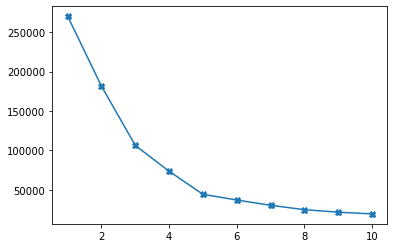

In [30]:
# Plotting of Elbow
plt.plot(range(1,11), wcss, marker='X') # Here, we can clearly see that Elbow point is at 5 ie. no of cluster = 5